In [1]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

# load MNIST

In [2]:
mnist=load_digits()

In [3]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [4]:
x=mnist['data']
labels=mnist['target']

In [5]:
# set a cutoff to not run all values in mnist dataset
cutoff=1000
x_small=x[:cutoff]
l_small=labels[:cutoff]

In [8]:
print(np.shape(x_small))

(1000, 64)


# Do the TSNE thing

In [6]:
rng_state=1         #just a random seed
perp=40             #default=30.0
n_iters=350
ee=12.0               #default=12.0
tsne = TSNE(random_state = rng_state, perplexity=perp, n_iter=n_iters, early_exaggeration=ee).fit_transform(x_small)

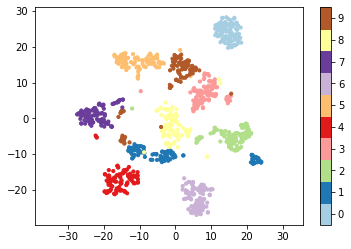

In [7]:
#s parameter sets size of scattered dots. 
#large makes areas more visible, but may hide outliers caught under them
#colormaps here: https://matplotlib.org/stable/users/explain/colors/colormaps.html
# I guess the ones under Qualitative works best for us
plt.scatter(tsne[:, 0], tsne[:, 1], s= 10, c=l_small, cmap='Paired') 
plt.gca().set_aspect('equal', 'datalim')
adjust_tick = 0.5
plt.colorbar(boundaries=np.arange(11)-adjust_tick).set_ticks(np.arange(10))

perplexity: float, default=30.0

    The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significantly different results. The perplexity must be less than the number of samples.

early_exaggeration: float, default=12.0

    Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them. For larger values, the space between natural clusters will be larger in the embedded space. Again, the choice of this parameter is not very critical. If the cost function increases during initial optimization, the early exaggeration factor or the learning rate might be too high.

learning_rate: float or “auto”, default=”auto”

    The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. If the cost function gets stuck in a bad local minimum increasing the learning rate may help. Note that many other t-SNE implementations (bhtsne, FIt-SNE, openTSNE, etc.) use a definition of learning_rate that is 4 times smaller than ours. So our learning_rate=200 corresponds to learning_rate=800 in those other implementations. The ‘auto’ option sets the learning_rate to max(N / early_exaggeration / 4, 50) where N is the sample size, following [4] and [5].
